# Sentiment Analysis in Python

This notebook is part of a tutorial that can be found on my [youtube channel here](https://www.youtube.com/channel/UCxladMszXan-jfgzyeIMyvw), please check it out!

In this notebook we will be doing some sentiment analysis in python using two different techniques:
1. VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach
2. Roberta Pretrained Model from 🤗
3. Huggingface Pipeline

# Step 0. Read in Data and NLTK Basics

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
!python3 -m nltk.downloader averaged_perceptron_tagger

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
!pip install nltk
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [ ]:
!pip install nltk
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [ ]:
!pip install nltk
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
!pip install nltk
!python -m nltk.downloader vader_lexicon

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [ ]:
# Read in data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/inputCSV/mouthwash.csv')
print(df.shape)
df = df.head(500)
print(df.shape)

(117, 4)
(117, 4)


In [ ]:
df.head(19)

,Index,review_rating,review_title,review_body
0,1,5,Should use itfor cavities in teeth,Works fine. Use it twice a week. But should ri...
1,2,4,Four Stars,Paid more for vim dishwasher gel then price given
2,3,5,Product is as advertised,Product is as advertised
3,4,4,Four Stars,Have been using for a long time. Effective and...
4,5,4,Very nice product,I m happy to buy this product..worth buying :-)
5,6,4,Four Stars,Ok...
6,7,1,बहुत गन्दा taste like kerosin .,very bad quality mouthwash .it's taste like ke...
7,8,4,Great Buy,Great buy on lightning deal.Product is made in...
8,9,5,Colgate,I love this
9,10,5,Good,Good nd refreshing


# Step 1. VADER Seniment Scoring

We will use NLTK's `SentimentIntensityAnalyzer` to get the neg/neu/pos scores of the text.

- This uses a "bag of words" approach:
    1. Stop words are removed
    2. each word is scored and combined to a total score.

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [ ]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.687, 'pos': 0.313, 'compound': 0.9646}

In [ ]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    if pd.notna(row['Review Text']):
        text = row['Review Text']
        myid = i
        res[myid] = sia.polarity_scores(text)

  0%|          | 0/117 [00:00<?, ?it/s]

In [ ]:
sentiment_df = pd.DataFrame(res).T

# Merge the sentiment DataFrame with the original DataFrame
merged_df = pd.concat([df, sentiment_df], axis=1)



In [ ]:
# Define thresholds
neutral_threshold_low = -0.33
neutral_threshold_high = 0.33
sentiment_classifications=[]
# Categorize compound scores and add classifications to the list
for key, value in res.items():
    compound_score = value['compound']
    if compound_score < neutral_threshold_low:
        sentiment_classifications.append('Negative')
    elif compound_score > neutral_threshold_high:
        sentiment_classifications.append('Positive')
    else:
        sentiment_classifications.append('Neutral')


In [ ]:
# Add the list of classifications as a new column in the DataFrame
merged_df['Sentiment Classification'] = sentiment_classifications

In [ ]:
# Save the merged DataFrame back to a CSV file
merged_df.to_csv('/content/drive/MyDrive/Colab Notebooks/outputCSV/mouthwash.csv', index=False)

In [ ]:
vaders = pd.DataFrame(res).T
# Reset the index of vadder and rename the index column to 'Index'
vaders = vaders.reset_index().rename(columns={'index': 'Index'})

# Merge vadders and df based on the index
merged_df = pd.merge(vaders, df, left_on='Index', right_index=True, how='left')


In [ ]:
# Now we have sentiment score and metadata
vaders.head()

,Index,neg,neu,pos,compound
0,0,0.000,0.741,0.259,0.4215
1,1,0.000,0.238,0.762,0.4927
2,2,0.000,0.256,0.744,0.4404
3,3,0.000,0.000,1.000,0.4404
4,4,0.132,0.700,0.169,0.2263


## Plot VADER results

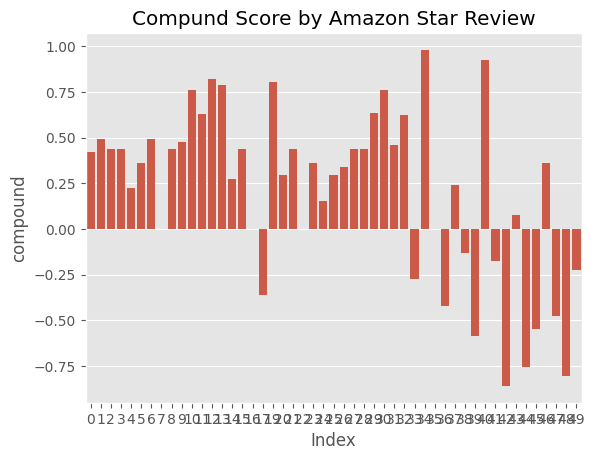

In [ ]:
ax = sns.barplot(data=vaders, x='Index', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

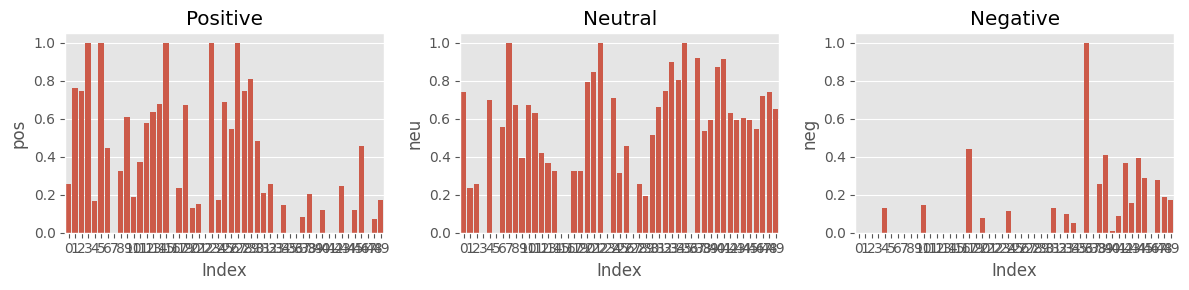

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Index', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Index', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Index', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()